In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


# Mobile Price Classification

## Importing Libraries

In [21]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the Train and Test Data

In [22]:
train = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')

In [23]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Exploring the data

In [24]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [25]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [26]:
test.drop('id',axis=1,inplace=True)

In [27]:
test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


<AxesSubplot: xlabel='price_range', ylabel='count'>

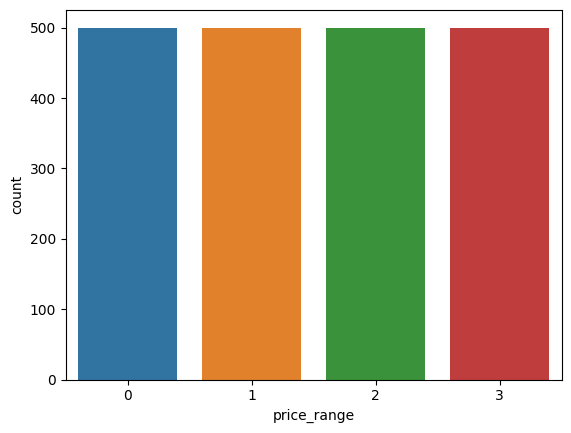

In [31]:
sns.countplot(x='price_range', data=train)


In [33]:
train.shape,test.shape

((2000, 21), (1000, 20))

In [34]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [37]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


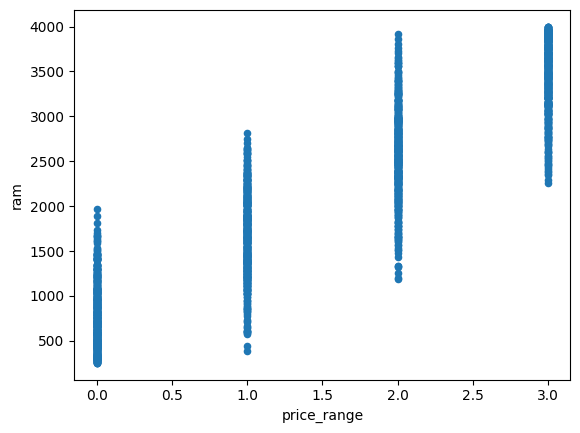

In [38]:
train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

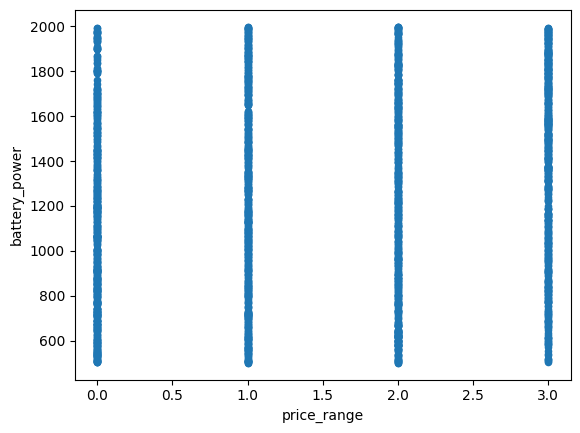

In [39]:
train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

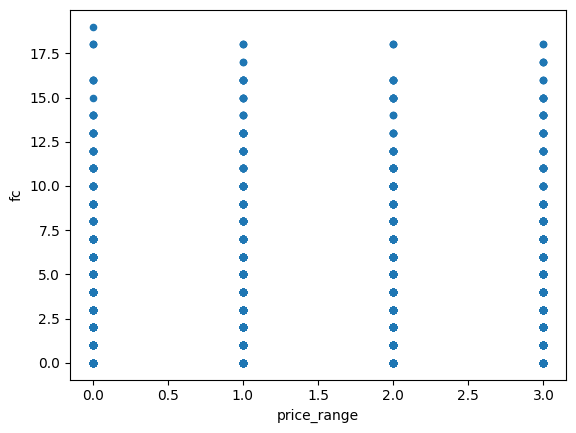

In [40]:
train.plot(x='price_range',y='fc',kind='scatter')
plt.show()

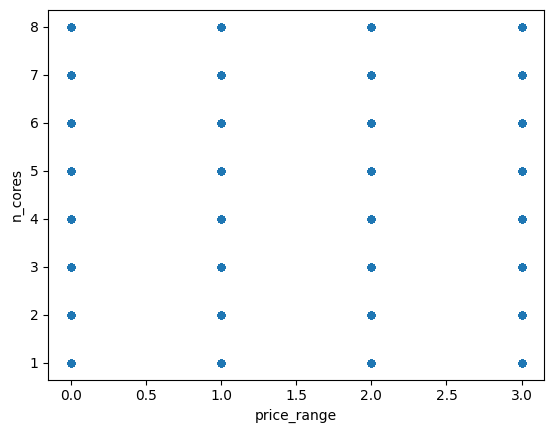

In [41]:
train.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

## Correlation Heatmap

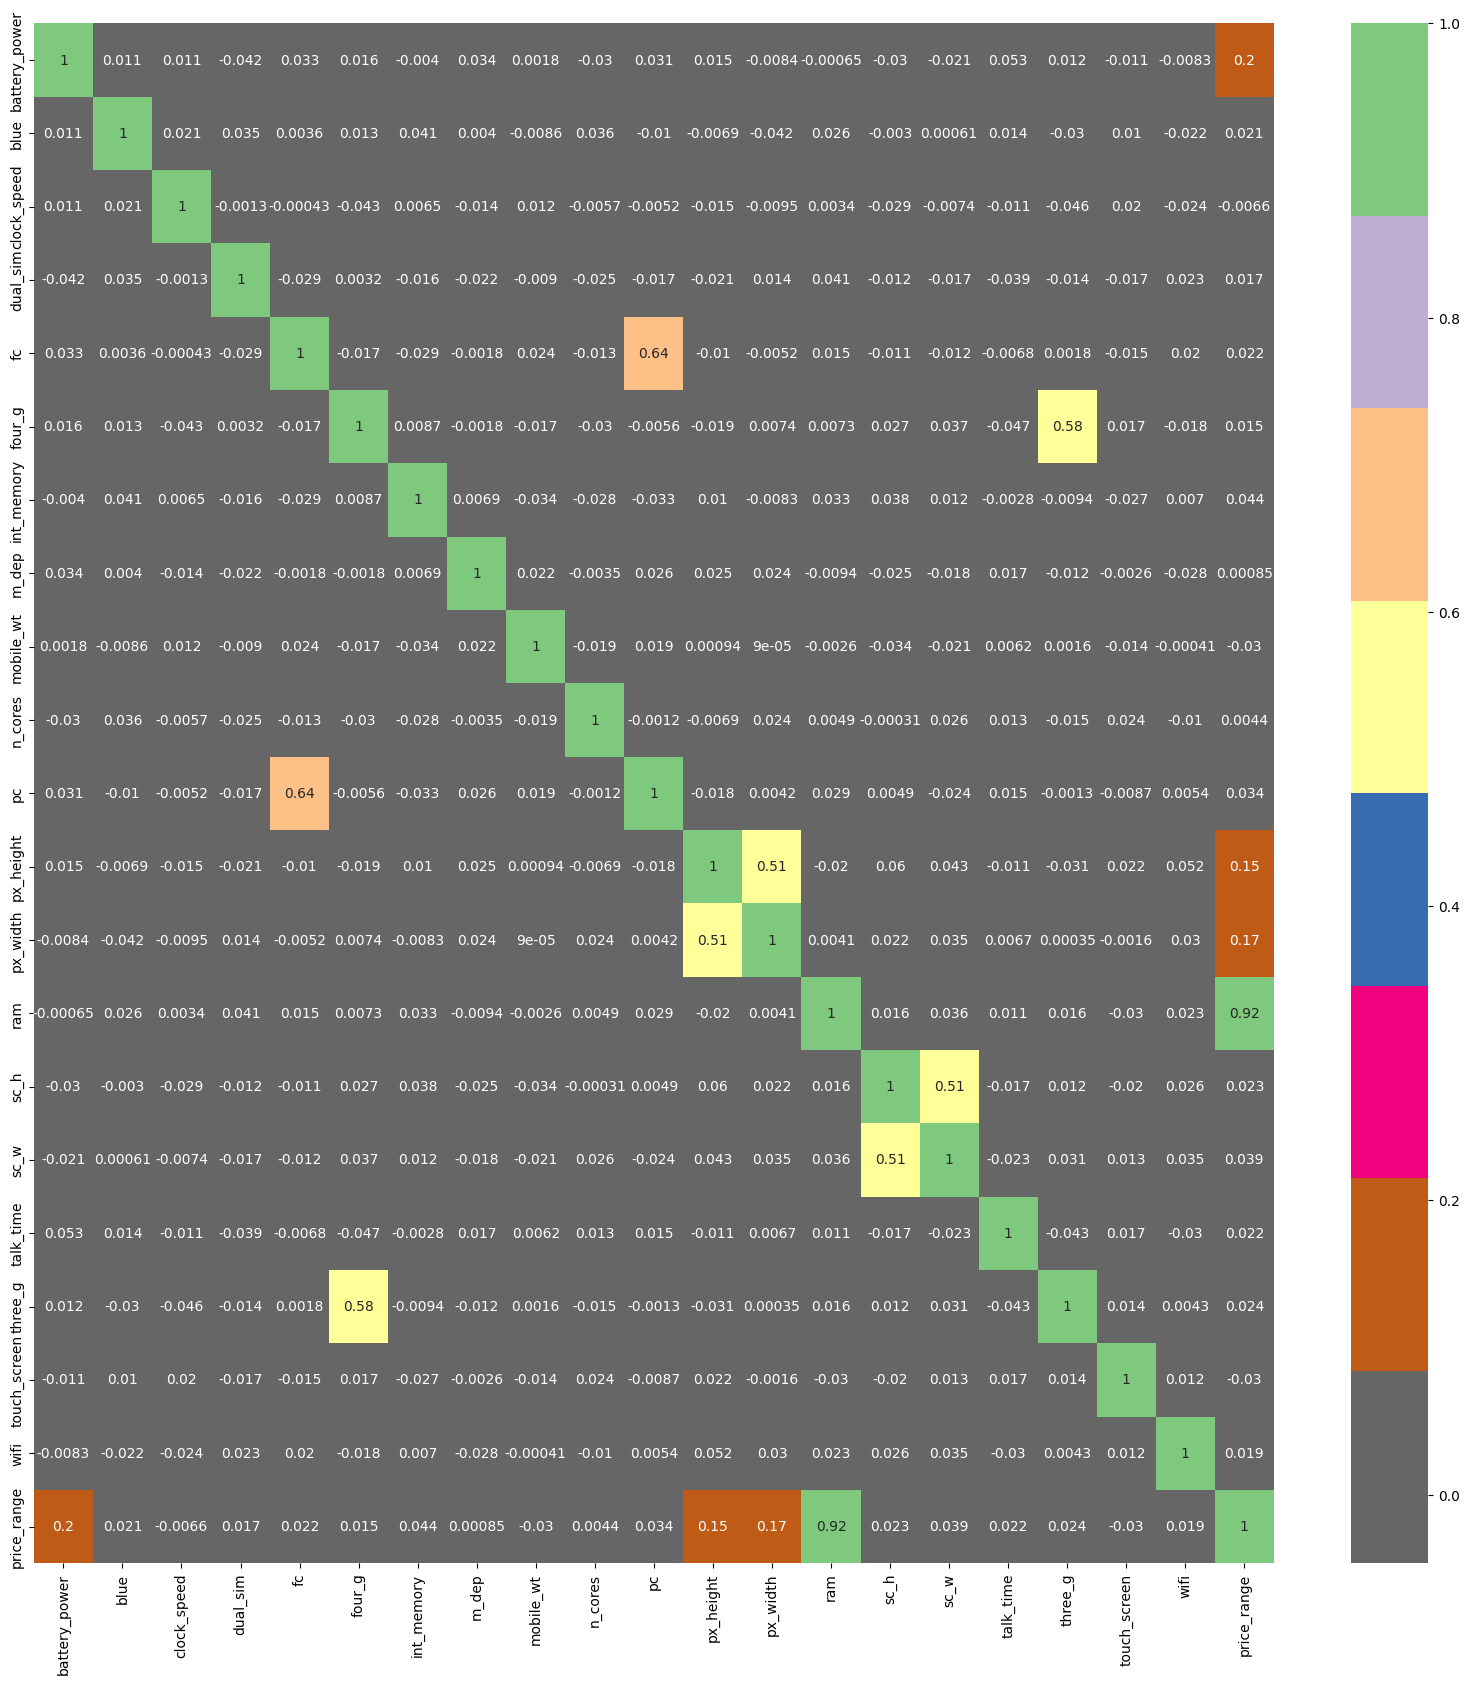

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.Accent_r)
plt.show()

## Box Plot

<AxesSubplot: >

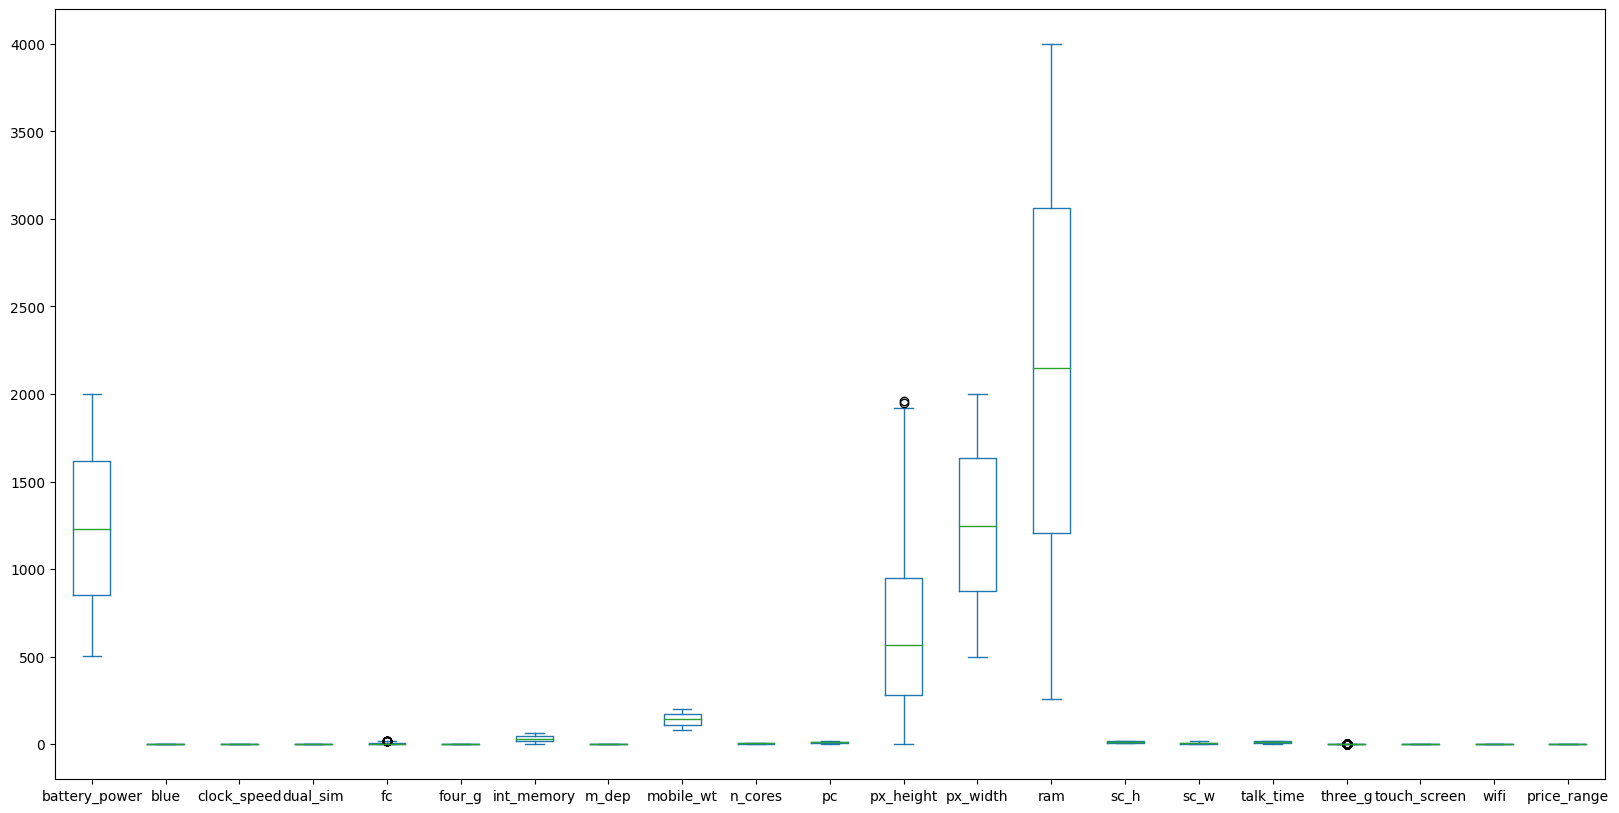

In [43]:
train.plot(kind='box',figsize=(20,10))

## Data Splitting and Preprocessing

In [44]:
X = train.drop('price_range',axis=1)
y = train['price_range']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test = sc.transform(test)

In [47]:
X_train

array([[-1.62737257, -0.98675438, -1.01271559, ..., -1.78222729,
        -1.00892875, -0.99888951],
       [-0.75199354,  1.01342342,  0.58093235, ..., -1.78222729,
         0.99115027, -0.99888951],
       [-0.20630271,  1.01342342,  0.70352065, ...,  0.56109566,
        -1.00892875,  1.00111173],
       ...,
       [ 0.69636086,  1.01342342, -0.03200917, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.83733099, -0.98675438, -1.2578922 , ...,  0.56109566,
        -1.00892875,  1.00111173],
       [ 0.4144206 , -0.98675438, -0.39977408, ...,  0.56109566,
         0.99115027,  1.00111173]])

In [48]:
X_test

array([[ 0.28481903, -0.98675438, -1.2578922 , ...,  0.56109566,
        -1.00892875, -0.99888951],
       [-1.44092821, -0.98675438, -1.2578922 , ...,  0.56109566,
         0.99115027,  1.00111173],
       [-1.49322358, -0.98675438, -0.15459747, ...,  0.56109566,
        -1.00892875,  1.00111173],
       ...,
       [-0.55418061,  1.01342342,  0.33575574, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.09610095, -0.98675438, -0.89012729, ...,  0.56109566,
         0.99115027,  1.00111173],
       [-1.60690917, -0.98675438,  1.07128556, ...,  0.56109566,
         0.99115027, -0.99888951]])

In [49]:
test

array([[-0.4541373 ,  1.01342342,  0.33575574, ..., -1.78222729,
         0.99115027, -0.99888951],
       [-0.91342707,  1.01342342, -1.2578922 , ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 1.2829785 ,  1.01342342,  1.56163877, ..., -1.78222729,
         0.99115027,  1.00111173],
       ...,
       [-0.13127022, -0.98675438, -0.15459747, ...,  0.56109566,
        -1.00892875, -0.99888951],
       [ 0.65998148,  1.01342342, -1.2578922 , ..., -1.78222729,
         0.99115027, -0.99888951],
       [ 0.06199528,  1.01342342, -1.2578922 , ...,  0.56109566,
        -1.00892875,  1.00111173]])

## Model Training

### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train , Y_train)

DecisionTreeClassifier()

In [51]:
pred = dtc.predict(X_test)
pred

array([1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 3, 1,
       2, 3, 2, 2, 2, 1, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 3, 2,
       2, 1, 1, 3, 3, 1, 0, 0, 2, 3, 3, 2, 0, 3, 3, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 3, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 3, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 2, 3, 0, 2, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 2, 1, 3, 2, 0, 3, 3, 1, 3, 1, 3, 3, 2, 1, 1, 1, 0,
       1, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 1, 0, 0, 1, 3, 2, 0, 2, 1, 3, 2,
       3, 2, 2, 0, 3, 1, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       1, 2, 2, 1, 2, 1, 0, 1, 3, 2, 1, 2, 1, 3, 1, 0, 2, 3, 0, 3, 0, 0,
       3, 0])

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
dtc_acc = accuracy_score(pred,Y_test)
print(dtc_acc)
print(confusion_matrix(pred,Y_test))

0.835
[[43  5  0  0]
 [ 7 39  7  0]
 [ 0  2 47  4]
 [ 0  0  8 38]]


### Support Vector Machine Classifier

In [53]:
from sklearn.svm import SVC
knn=SVC()
knn.fit(X_train,Y_train)

SVC()

In [54]:
pred1 = knn.predict(X_test)
pred1

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 3, 2,
       3, 0, 2, 3, 3, 1, 0, 1, 2, 3, 2, 2, 0, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 1, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 3, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 1, 1, 1, 3, 1, 0, 3, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 3, 2, 0, 2, 0, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 1, 2, 1, 2, 1, 0, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0])

In [55]:
from sklearn.metrics import accuracy_score
svc_acc = accuracy_score(pred1,Y_test)
print(svc_acc)
print(confusion_matrix(pred1,Y_test))

0.88
[[46  3  0  0]
 [ 4 40  8  0]
 [ 0  3 52  4]
 [ 0  0  2 38]]


### Logistic Regression  (classification)

In [56]:
from sklearn.linear_model import LogisticRegression  # its a classification
lr=LogisticRegression()
lr.fit(X_train,Y_train)

LogisticRegression()

In [57]:
pred2 = lr.predict(X_test)
pred2

array([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 3, 1,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 1, 1, 2, 3, 2,
       3, 0, 1, 3, 3, 1, 0, 0, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 3, 1, 3, 1,
       0, 0, 0, 2, 1, 2, 3, 2, 1, 3, 3, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1,
       0, 0, 3, 2, 0, 2, 0, 3, 2, 0, 2, 3, 0, 1, 3, 3, 0, 3, 0, 0, 2, 0,
       1, 0, 3, 2, 2, 1, 1, 3, 1, 0, 3, 2, 2, 3, 1, 2, 3, 2, 1, 1, 1, 0,
       0, 1, 0, 2, 3, 0, 2, 3, 1, 3, 0, 0, 0, 1, 1, 2, 2, 0, 3, 1, 2, 2,
       3, 2, 2, 0, 3, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 3, 1, 2, 0, 3, 1, 3,
       2, 2, 3, 2, 2, 1, 0, 1, 3, 2, 1, 2, 0, 3, 1, 0, 2, 2, 0, 2, 0, 0,
       3, 0])

In [58]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(pred2,Y_test)
print(lr_acc)
print(confusion_matrix(pred2,Y_test))

0.955
[[49  1  0  0]
 [ 1 45  3  0]
 [ 0  0 56  1]
 [ 0  0  3 41]]


## Model Evaluation

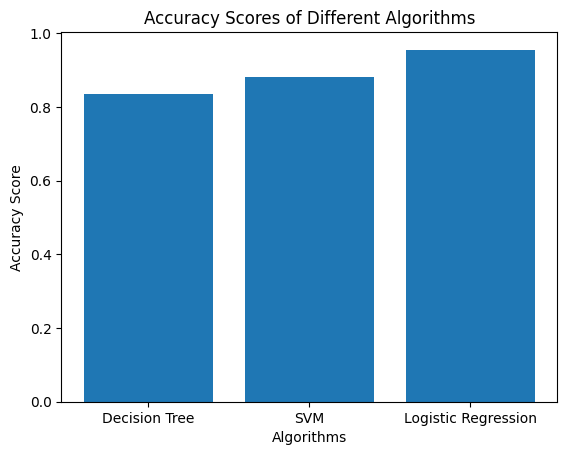

In [60]:
plt.bar(x=['Decision Tree', 'SVM', 'Logistic Regression'], height=[dtc_acc, svc_acc, lr_acc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Scores of Different Algorithms")
plt.show()


## Making Prediction using Logistic Regression Model

In [62]:
y_pred = lr.predict(test)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

## Visualizing Predicted Values using a Histogram

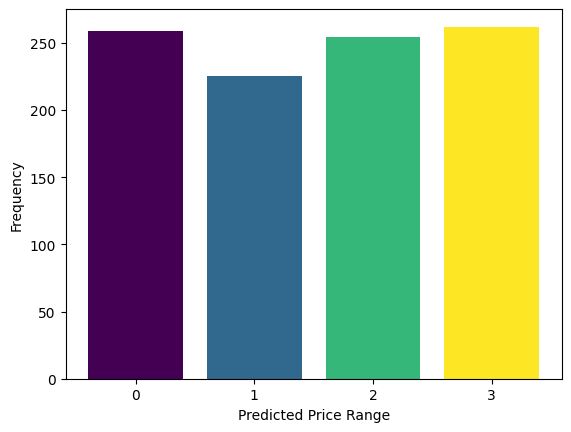

In [74]:
colors = plt.cm.viridis(np.linspace(0, 1, 4))
for i in range(4):
    plt.bar(i, np.sum(y_pred == i), color=colors[i])
plt.xlabel('Predicted Price Range')
plt.ylabel('Frequency')
plt.xticks(range(4), ['0', '1', '2', '3'])
plt.show()